In [1]:
import spacy
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Train.csv")
train_data["Text"] = train_data["Text"].str.lower()
train_data

,ID,Text,Label
0,ID_AASHwXxg,mwangonde: khansala wachinyamata akamati achi...,POLITICS
1,ID_AGoFySzn,mcp siidakhutire ndi kalembera chipani cha ma...,POLITICS
2,ID_AGrrkBGP,bungwe la manepo lapempha boma liganizire anth...,HEALTH
3,ID_AIJeigeG,ndale zogawanitsa miyambo zanyanya si zachile...,POLITICS
4,ID_APMprMbV,nanga wapolisi ataphofomoka? masiku ano sichi...,LAW/ORDER
...,...,...,...
1431,ID_zmTmmEio,eni minibus ati ali ndi ufulu wokweza mitengo ...,TRANSPORT
1432,ID_znOlIaGQ,kachali apepesa: kulankhula motumbwa kuthe an...,POLITICS
1433,ID_znracTjN,mawu supports non-fiction writers the malawi ...,EDUCATION
1434,ID_ztdsmmva,tame mwawa: phwete ndiye kudya kwake sewero l...,SOCIAL ISSUES


In [3]:
train_data["Label"].value_counts() / len(train_data)

POLITICS                0.194290
SOCIAL                  0.105850
RELIGION                0.102368
LAW/ORDER               0.094708
SOCIAL ISSUES           0.093315
HEALTH                  0.088440
ECONOMY                 0.059889
FARMING                 0.054318
SPORTS                  0.034123
EDUCATION               0.029944
RELATIONSHIPS           0.027159
WILDLIFE/ENVIRONMENT    0.025070
OPINION/ESSAY           0.018106
LOCALCHIEFS             0.017409
CULTURE                 0.016017
WITCHCRAFT              0.011142
MUSIC                   0.010446
TRANSPORT               0.007660
ARTS AND CRAFTS         0.004875
FLOODING                0.004875
Name: Label, dtype: float64

In [13]:
top_categories = ["POLITICS", "SOCIAL", "RELIGION", "LAW/ORDER", "SOCIAL ISSUES", "HEALTH", "ECONOMY", "FARMING"]

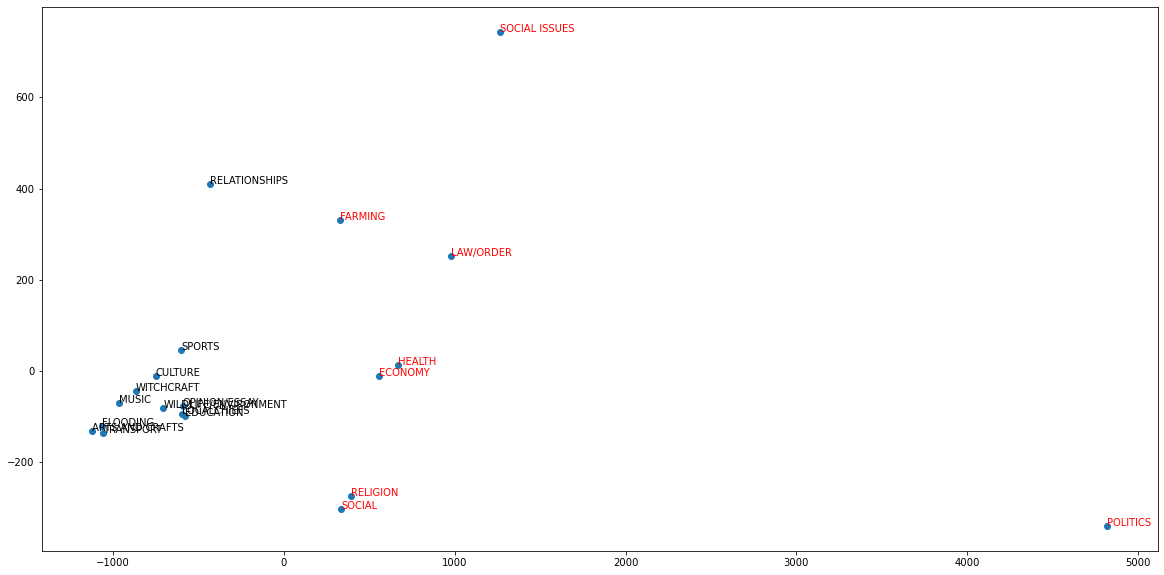

In [14]:
categories = []
categoryText = []
for category, df in train_data.groupby("Label"):
    categories.append(category)
    categoryText.append(" ".join(df["Text"].astype(str).values))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(categoryText)

pca = PCA(n_components=2)
result = pca.fit_transform(X.toarray())
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])
for i, category in enumerate(categories):
	plt.annotate(category, xy=(result[i, 0], result[i, 1]), color = "red" if category in top_categories else None)
plt.show()

In [5]:
stop_words = pd.read_csv("stopwords.csv", usecols=["Chichewa"])
sw = set(stop_words.values[:100].flatten().tolist())

In [6]:
sw

{'a',
 'adzatero',
 'ali',
 'aliyense',
 'amachita',
 'amafunika',
 'anali',
 'anapita',
 'anasiyira',
 'anati',
 'anthu',
 'awo',
 'ayenela',
 'bambo',
 'bwanji',
 'bwino',
 'chani',
 'chifukwa',
 'chithunzi',
 'doko',
 'dzanja',
 'dziko',
 'ena',
 'ife',
 'ine',
 'inu',
 'iwo',
 'iye',
 'izi',
 'izo',
 'kachiwiri',
 'kapena',
 'koma',
 'komanso',
 'kuchita',
 'kuchokera',
 'kudziona',
 'kufunsa',
 'kuika',
 'kukhala',
 'kumanga',
 'kunyumba',
 'kusewera',
 'kusintha',
 'kuti',
 'kutsatira',
 'kuunika',
 'kuwerenga',
 'kuyesa',
 'kuziwerenga',
 'lapansi',
 'mawu',
 'mayi',
 'mchitidwe',
 'mfundo',
 'mkulu',
 'mmodzi',
 'monga',
 'mpweya',
 'mtundu',
 'mu',
 'm’nyumba',
 'ndi',
 'ndikuuzeni',
 'ndingathere',
 'ndipo',
 'ngakhale',
 'ngati',
 'nthawi',
 'nyama',
 'oterowo',
 'pa',
 'pafupi',
 'pano',
 'tikufuna',
 'tsiriza',
 'umene',
 'wake',
 'waung’ono',
 'wonjezerani',
 'wotentha',
 'yaikulu',
 'zitatu'}

In [7]:
nlp = spacy.load("en_core_web_sm")
def preprocess(x):
    tokens = []
    doc = nlp(x)
    for sent in doc.sents:
        tokens += [str(token) for token in sent if str(token) not in sw and not token.is_punct]
    return " ".join(tokens)

In [8]:
processed_train_data = train_data.copy()
processed_train_data["Text"] = processed_train_data["Text"].apply(preprocess)
processed_train_data

,ID,Text,Label
0,ID_AASHwXxg,mwangonde khansala wachinyamata akamati achi...,POLITICS
1,ID_AGoFySzn,mcp siidakhutire kalembera chipani cha malaw...,POLITICS
2,ID_AGrrkBGP,bungwe la manepo lapempha boma liganizire achi...,HEALTH
3,ID_AIJeigeG,ndale zogawanitsa miyambo zanyanya si zachil...,POLITICS
4,ID_APMprMbV,nanga wapolisi ataphofomoka masiku ano sichi...,LAW/ORDER
...,...,...,...
1431,ID_zmTmmEio,eni minibus ati ufulu wokweza mitengo mwa amen...,TRANSPORT
1432,ID_znOlIaGQ,kachali apepesa kulankhula motumbwa kuthe ma...,POLITICS
1433,ID_znracTjN,supports non fiction writers the malawi writ...,EDUCATION
1434,ID_ztdsmmva,tame mwawa phwete ndiye kudya kwake sewero l...,SOCIAL ISSUES


In [9]:
processed_train_data.to_csv("Train-no-stopwords.csv", index=None)

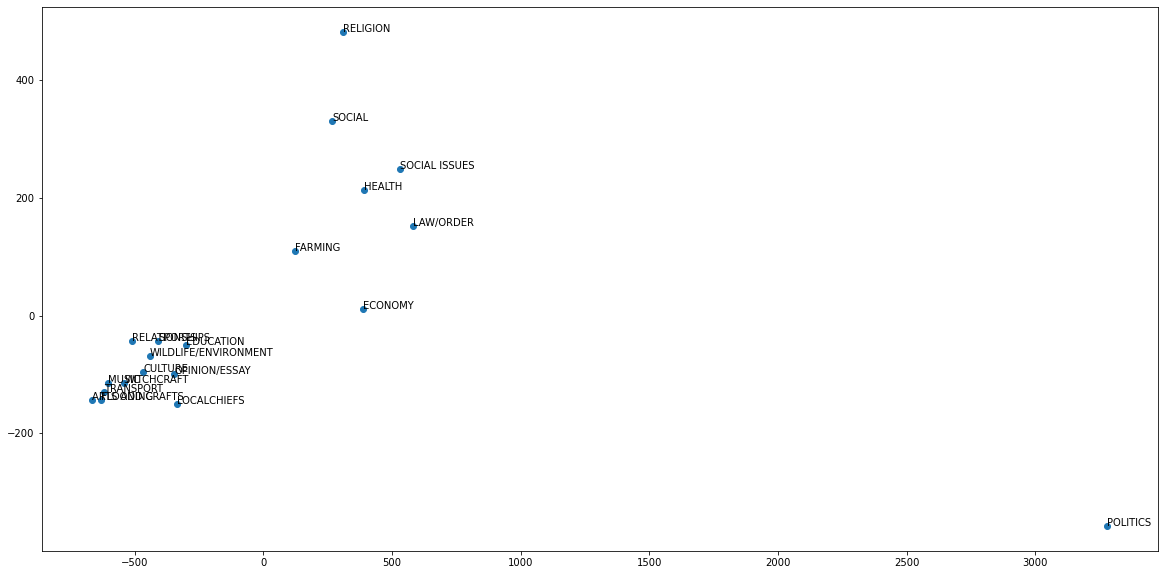

In [13]:
categories = []
categoryText = []
for category, df in processed_train_data.groupby("Label"):
    categories.append(category)
    categoryText.append(" ".join(df["Text"].astype(str).values))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(categoryText)

pca = PCA(n_components=2)
result = pca.fit_transform(X.toarray())
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])
for i, category in enumerate(categories):
	plt.annotate(category, xy=(result[i, 0], result[i, 1]))
plt.show()